In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_csv("diabetes.csv") 

In [8]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [41]:
data.isnull()
data = data.dropna()

In [10]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
def minkowski_distance(a, b, p=2):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(float(a[d]) - float(b[d]))**p  # Convert string to float before calculation
    distance = distance**(1/p)
    return distance
minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1) #Manhattan dist


106.276

In [45]:
test_pt = [148, 85, 103,71, 44]
distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,168.303298
1,163.334014
2,194.170029
3,166.727322
4,212.718123


In [46]:
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:3] #using 3 nearest neighbour
df_nn

,dist
358,142.853071
92,146.625373
625,147.180162


In [47]:
from collections import Counter
counter = Counter(y[df_nn.index])
counter.most_common()[0][0]

0

In [48]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
            
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        y_hat_test.append(prediction)
        
    return y_hat_test

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=1)

print(y_hat_test)


[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [49]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.6753246753246753


In [50]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_hat_test, pos_label=1)
print("Precision Score:", precision)

Precision Score: 0.5471698113207547


In [23]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_hat_test, pos_label=1)
print("Recall (Sensitivity) Score:", recall)

Recall (Sensitivity) Score: 0.5272727272727272


In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_hat_test, pos_label=1)
print("F1-Score:", f1)

F1-Score: 0.537037037037037


In [51]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[75 24]
 [26 29]]


In [52]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, p=2)   #just to verify 
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")


Sklearn KNN Accuracy: 0.7077922077922078


Text(0, 0.5, 'Accuracy (%)')

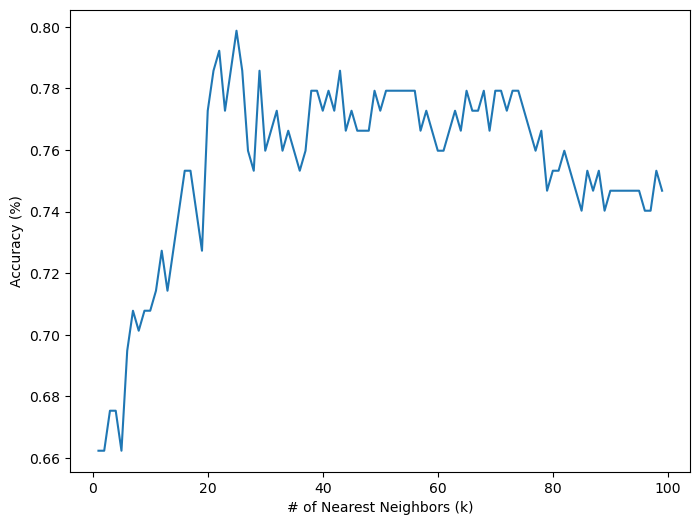

In [27]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')


In [53]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [54]:
print(y_test)

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64


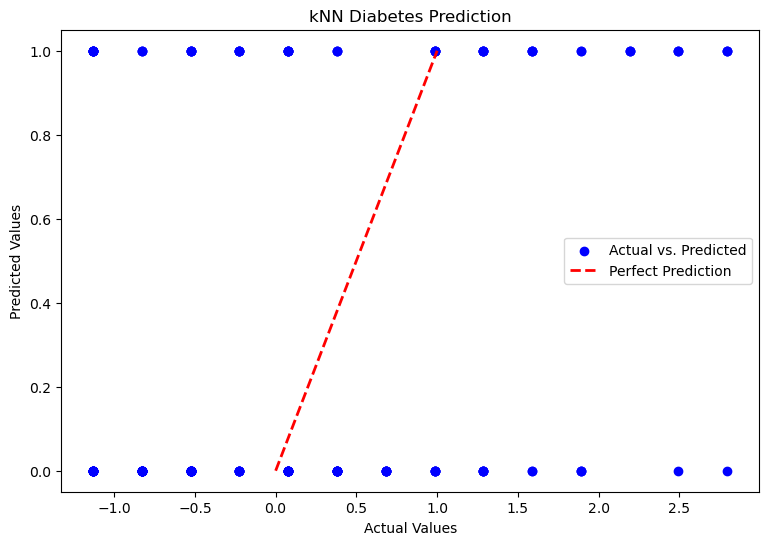

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(X_test[:,0], y_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('kNN Diabetes Prediction')
plt.legend()
plt.show()


In [56]:
def fitness_function(params):
    k = params['n_neighbors']
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracy = accuracy_score(y_test, y_hat_test)
    return accuracy

In [57]:
n_neighbors_range = (1, 30) 
def initialize_population(population_size):
    return [random.randint(n_neighbors_range[0], n_neighbors_range[1]) for _ in range(population_size)]


In [58]:
def OOA(SearchAgents, Max_iterations, lowerbound, upperbound, fitness):
    X = np.random.randint(lowerbound, upperbound + 1, size=(SearchAgents,))
    fit = np.array([fitness({'n_neighbors': X[i]}) for i in range(SearchAgents)])
    best_so_far = np.zeros(Max_iterations)
    
    for t in range(1, Max_iterations + 1):
        Fbest, blocation = min(fit), np.argmin(fit)

        if t == 1 or Fbest < best_so_far[t-2]:
            xbest, fbest = X[blocation], Fbest

        for i in range(SearchAgents):
            fish_position = np.where(fit < fit[i])[0]

            if fish_position.size == 0:
                selected_fish = xbest
            else:
                k = np.random.choice(fish_position)  # Randomly choose from fish positions
                selected_fish = X[fish_position[k]]

            I = round(1 + np.random.rand())
            X_new_P1 = X[i] + np.random.rand() * (selected_fish - I * X[i])
            X_new_P1 = np.maximum(X_new_P1, lowerbound)
            X_new_P1 = np.minimum(X_new_P1, upperbound)

            fit_new_P1 = fitness({'n_neighbors': X_new_P1})
            if fit_new_P1 < fit[i]:
                X[i] = X_new_P1
                fit[i] = fit_new_P1

            X_new_P1 = X[i] + (lowerbound + np.random.rand() * (upperbound - lowerbound)) / t
            X_new_P1 = np.maximum(X_new_P1, lowerbound)
            X_new_P1 = np.minimum(X_new_P1, upperbound)

            fit_new_P1 = fitness({'n_neighbors': X_new_P1})
            if fit_new_P1 < fit[i]:
                X[i] = X_new_P1
                fit[i] = fit_new_P1

        best_so_far[t-1] = fbest

    return fbest, xbest, best_so_far

# Example usage
n_neighbors_range = (1, 10)  # Define your desired range for k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
population_size = 10
max_iterations = 50
lowerbound = n_neighbors_range[0]
upperbound = n_neighbors_range[1]

Best_score, Best_pos, OOA_curve = OOA(population_size, max_iterations, lowerbound, upperbound, fitness_function)

print("Best Score:", Best_score)  # Convert back to positive accuracy value
print("Best Number of Neighbors:", Best_pos)

ValueError: could not convert string to float: 'P'